# PCA vs ICA vs NMF

In [ ]:
%pylab inline
%load_ext blackcellmagic
import numpy as np
from numpy import linalg as LA

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA

#sns.set_context('talk', font_scale=2)
sns.set_style('white')

In [2]:
colors1 = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
colors2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

In [3]:
np.random.seed(42)
mean = [2, 6]
cov = [[0.1, 0], [0, 0.1]]  # diagonal covariance
X = (
    np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T
    + 2
    + np.random.rand(2, 100).T
)
Z = np.vstack([(np.random.multivariate_normal(mean, cov, 100).T).T, X])
Z -= np.min(Z)

Z_norm = Z - np.mean(Z) / Z.std()

In [4]:
pca = PCA()
S_pca_ = pca.fit(Z).transform(Z)
# pca.components_: Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.
# array, shape (n_components, n_features)
pca_x_axis, pca_y_axis = pca.components_.T

ica = FastICA(n_components=2)
ica.fit(Z)
# ica.mixing_: mixing_array, shape (n_features, n_components)
# The pseudo-inverse of components_. It is the linear operator that maps independent sources to the data.
ica_x_axis, ica_y_axis = ica.mixing_
ica_x_axis /= LA.norm(ica_x_axis)
ica_y_axis /= LA.norm(ica_y_axis)

nmf_model = NMF(n_components=2, init="random", random_state=0)
W = nmf_model.fit_transform(Z)
nmf_x_axis, nmf_y_axis = nmf_model.components_.T

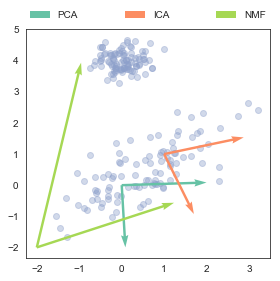

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(Z_norm[:, 0], Z_norm[:, 1], alpha=0.4, color=colors1[2])
l1 = ax.quiver(
    0,
    0,
    pca_x_axis,
    pca_y_axis,
    zorder=11,
    width=0.01,
    angles="xy",
    scale_units="xy",
    scale=1/2,
    color=colors1[0],
)
l2 = ax.quiver(
    1,
    1,
    ica_x_axis,
    ica_y_axis,
    zorder=11,
    width=0.01,
    angles="xy",
    scale_units="xy",
    scale=1/2,
    color=colors1[1],
)
l3 = ax.quiver(
    -2,
    -2,
    nmf_x_axis,
    nmf_y_axis,
    zorder=11,
    width=0.01,
    angles="xy",
    scale_units="xy",
    scale=1 / 2,
    color=colors1[4],
)
plt.legend([l1, l2, l3], ["PCA", "ICA", "NMF"], frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)
fig.tight_layout()
fig.savefig('pca_ica_nmf.pdf')
fig.savefig('pca_ica_nmf.png', dpi=300)